# TASK 3

Perform customer segmentation using clustering techniques to group customers based on their
purchasing behavior, allowing businesses to target each segment effectively.

# Step 1: Load the Dataset

In [27]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'Customers.csv' 
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df
# Inspect the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)
print("\nMissing values:\n", data.isnull().sum())
print("\nDuplicate entries:", data.duplicated().sum())
print("\nData types:\n", data.dtypes)
print("\nSummary statistics:\n", data.describe())
print(data.columns.tolist())

Shape of the dataset: (2000, 8)
Columns in the dataset: Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

Missing values:
 CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Duplicate entries: 0

Data types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

Summary statistics:
         CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000 

# Step 2: Data Preprocessing

In [29]:
# Import scaling library
from sklearn.preprocessing import StandardScaler

features = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame for better visualization
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])
print("\nScaled data sample:\n", scaled_df.head())


Scaled data sample:
         Age  Annual Income  Spending Score
0 -1.054089      -2.093501       -0.428339
1 -0.983723      -1.656133        1.075546
2 -1.018906      -0.540845       -1.609962
3 -0.913356      -1.131292        0.932319
4 -0.631891      -1.590528       -0.392532


# Step 3: Determine Optimal Number of Clusters

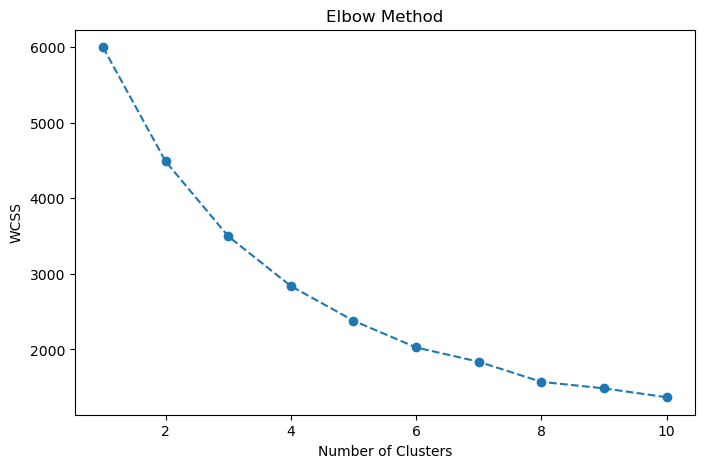

In [32]:
# Import libraries for clustering and evaluation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Test cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Apply K-Means Clustering

In [35]:

k = 5  # Example value, update based on your Elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Inspect the clustered dataset
print("\nClustered data sample:\n", data.head())


Clustered data sample:
    CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  Cluster  
0     Healthcare                1            4        2  
1       Engineer                3            3        2  
2       Engineer                1            1        2  
3         Lawyer                0            2        1  
4  Entertainment                2            6        2  


# Step 5: Visualization

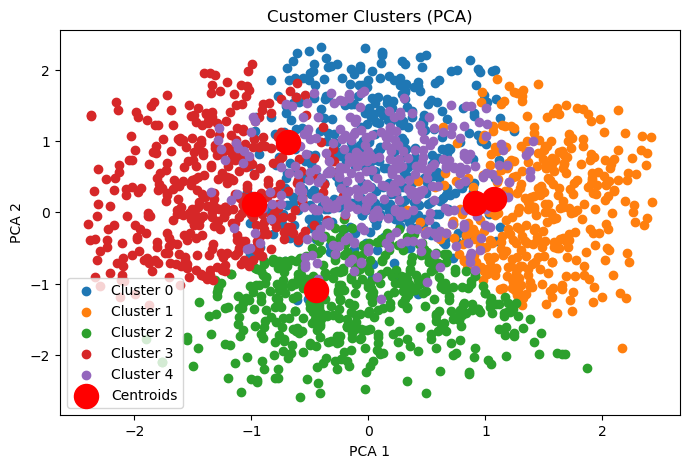

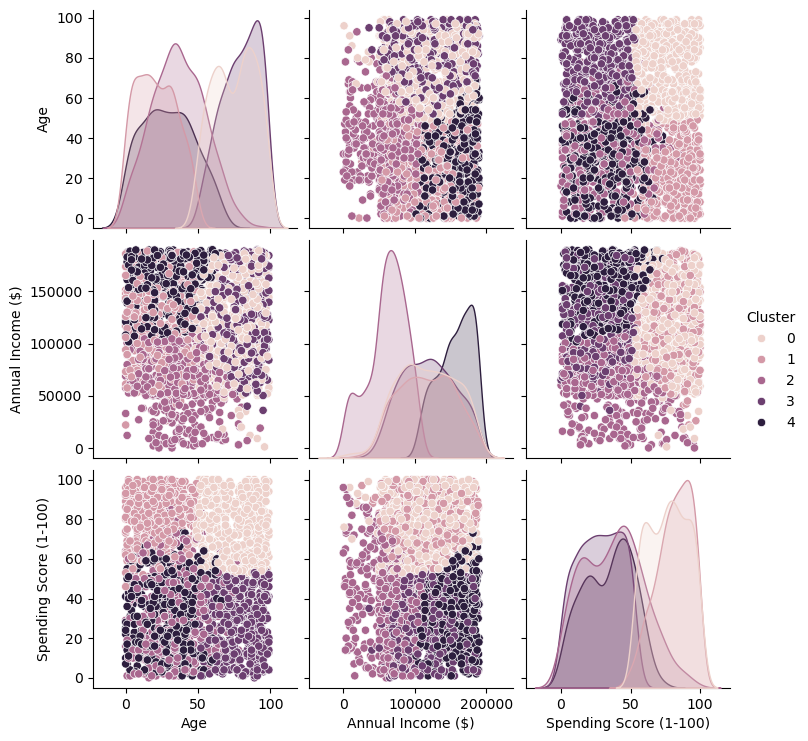

In [42]:
# 2D Scatter Plot Using PCA
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 5))
for cluster in range(k):
    plt.scatter(reduced_features[data['Cluster'] == cluster, 0],
                reduced_features[data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Clusters (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Pair Plot
import seaborn as sns

sns.pairplot(data, hue='Cluster', vars=['Age', 'Annual Income ($)', 'Spending Score (1-100)'])
plt.show()